<a href="https://colab.research.google.com/github/andresvillamayor/Dimensionalidad/blob/main/VotacionTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico: _Principal Component Analysis_ (PCA) y (K-Means)

En este caso de uso práctico se presenta un mecanismo de extracción de características (reducción de dimensionalidad) mediante el uso del algoritmo PCA.

## Conjunto de datos: Voto en diferentes elecciones de Candidaturas
- Presidentes
- Diputados
- Senadores
- Gobernadores
- Junta Departamental

---
### Descripción

- **Preparacion y Exploracion de Datos**

---


## Conexion con Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importacion de Librerias

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

## 1. Lectura del conjunto de datos

In [5]:
df = pd.read_excel('/content/drive/MyDrive/pca/resultados-2023-por-local.xlsx')

## 2. Visualización del conjunto de datos


In [ ]:
df.head()

,candidatura,departamento,distrito,zona,local,nromesa,lista1ANR,lista2AC,lista2APAD,lista2APLP,...,lista45PSDH,lista99PPT,lista99UPN,lista123CDN,lista300PPS,lista777UP,lista911PCN,nulos,blancos,total
0,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,1,185,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,35.0,0,10,296
1,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,2,158,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,46.0,1,5,302
2,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,3,169,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,50.0,0,5,306
3,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,4,141,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,35.0,1,9,270
4,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,5,166,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,0.0,49.0,1,4,299


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58741 entries, 0 to 58740
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   candidatura    58741 non-null  object 
 1   departamento   58741 non-null  object 
 2   distrito       58741 non-null  object 
 3   zona           58741 non-null  object 
 4   local          58741 non-null  object 
 5   nromesa        58741 non-null  int64  
 6   lista1ANR      58741 non-null  int64  
 7   lista2AC       358 non-null    float64
 8   lista2APAD     1145 non-null   float64
 9   lista2APLP     6610 non-null   float64
 10  lista2APUNCA   658 non-null    float64
 11  lista2APUNG    832 non-null    float64
 12  lista2APUNP    990 non-null    float64
 13  lista2APUNPH   436 non-null    float64
 14  lista2ASPP     12259 non-null  float64
 15  lista2ATJPÑ    374 non-null    float64
 16  lista2CN2023   10638 non-null  float64
 17  lista2PLRA     926 non-null    float64
 18  lista3

##3. Análisis de Datos

- Verificar Columnas
- Modificar la data de las Columnas para mejor comprension



In [ ]:
# Revisar las columnas
columnas = df.columns
columnas

Index(['candidatura', 'departamento', 'distrito', 'zona', 'local', 'nromesa',
       'lista1ANR', 'lista2AC', 'lista2APAD', 'lista2APLP', 'lista2APUNCA',
       'lista2APUNG', 'lista2APUNP', 'lista2APUNPH', 'lista2ASPP',
       'lista2ATJPÑ', 'lista2CN2023', 'lista2PLRA', 'lista3CN20232',
       'lista4APM', 'lista4APUNI', 'lista5APHPLP', 'lista5AUPC',
       'lista5AUPDEC', 'lista5AUPDP', 'lista5AUPDSP', 'lista5AUPN',
       'lista7UNACE', 'lista7VPB', 'lista8AB8', 'lista8PPQ', 'lista9AEN',
       'lista9PEN', 'lista10MPNR', 'lista14MHS', 'lista15PNU', 'lista19PLYR',
       'lista21PJFJ', 'lista23PVP', 'lista30PNG30A', 'lista33CPC',
       'lista38NAAP', 'lista40FGÑ', 'lista45PSDH', 'lista99PPT', 'lista99UPN',
       'lista123CDN', 'lista300PPS', 'lista777UP', 'lista911PCN', 'nulos',
       'blancos', 'total'],
      dtype='object')

In [ ]:
# Filtro de Candidatura
Filtro_Presidente = df[df['candidatura']== '1-PRESIDENTE Y VICEPRESIDENTE']
Filtro_Presidente

,candidatura,departamento,distrito,zona,local,nromesa,lista1ANR,lista2AC,lista2APAD,lista2APLP,...,lista45PSDH,lista99PPT,lista99UPN,lista123CDN,lista300PPS,lista777UP,lista911PCN,nulos,blancos,total
0,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,1,185,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,35.0,0,10,296
1,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,2,158,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,46.0,1,5,302
2,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,3,169,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,50.0,0,5,306
3,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,4,141,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,35.0,1,9,270
4,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,5,166,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,0.0,49.0,1,4,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58731,1-PRESIDENTE Y VICEPRESIDENTE,18-EXTERIOR,3-ESPAÑA,4-BILBAO,1-AYUNTAMIENTO BILBAO,1,24,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,85.0,2,2,155
58732,1-PRESIDENTE Y VICEPRESIDENTE,18-EXTERIOR,3-ESPAÑA,4-BILBAO,1-AYUNTAMIENTO BILBAO,2,9,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,15.0,0,0,32
58735,1-PRESIDENTE Y VICEPRESIDENTE,18-EXTERIOR,3-ESPAÑA,5-VALENCIA,1-CONSULADO HONORARIO DE VALENCIA,1,19,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,0.0,49.0,0,2,121
58737,1-PRESIDENTE Y VICEPRESIDENTE,18-EXTERIOR,3-ESPAÑA,6-ALICANTE,1-ASOCIACION PARAGUAYA DE ALICANTE (APA),1,16,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,0.0,23.0,0,1,70


In [ ]:
Filtro_Presidente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12259 entries, 0 to 58739
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   candidatura    12259 non-null  object 
 1   departamento   12259 non-null  object 
 2   distrito       12259 non-null  object 
 3   zona           12259 non-null  object 
 4   local          12259 non-null  object 
 5   nromesa        12259 non-null  int64  
 6   lista1ANR      12259 non-null  int64  
 7   lista2AC       0 non-null      float64
 8   lista2APAD     0 non-null      float64
 9   lista2APLP     0 non-null      float64
 10  lista2APUNCA   0 non-null      float64
 11  lista2APUNG    0 non-null      float64
 12  lista2APUNP    0 non-null      float64
 13  lista2APUNPH   0 non-null      float64
 14  lista2ASPP     0 non-null      float64
 15  lista2ATJPÑ    0 non-null      float64
 16  lista2CN2023   0 non-null      float64
 17  lista2PLRA     0 non-null      float64
 18  lista3

In [ ]:
Filtro_Presidente.drop (['lista2AC','lista2APAD','lista2APAD','lista2APLP','lista2APUNCA','lista2APUNG','lista2APUNP',
 'lista2APUNPH','lista2ASPP','lista2ATJPÑ','lista2CN2023','lista2PLRA','lista4APM','lista4APUNI','lista5APHPLP','lista5AUPC','lista5AUPDEC','lista5AUPDP','lista5AUPDSP',
 'lista5AUPN','lista7VPB','lista8AB8','lista8PPQ','lista9AEN','lista9PEN','lista19PLYR','lista38NAAP','lista40FGÑ','lista99PPT','lista99UPN','lista123CDN','lista300PPS'], axis = 1 , inplace = True)

In [ ]:
Filtro_Presidente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12259 entries, 0 to 58739
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   candidatura    12259 non-null  object 
 1   departamento   12259 non-null  object 
 2   distrito       12259 non-null  object 
 3   zona           12259 non-null  object 
 4   local          12259 non-null  object 
 5   nromesa        12259 non-null  int64  
 6   lista1ANR      12259 non-null  int64  
 7   lista3CN20232  12259 non-null  float64
 8   lista7UNACE    12259 non-null  float64
 9   lista10MPNR    12259 non-null  float64
 10  lista14MHS     12259 non-null  float64
 11  lista15PNU     12259 non-null  float64
 12  lista21PJFJ    12259 non-null  float64
 13  lista23PVP     12259 non-null  float64
 14  lista30PNG30A  12259 non-null  float64
 15  lista33CPC     12259 non-null  float64
 16  lista45PSDH    12259 non-null  float64
 17  lista777UP     12259 non-null  float64
 18  lista9

In [ ]:
Filtro_Presidente.head()

,candidatura,departamento,distrito,zona,local,nromesa,lista1ANR,lista3CN20232,lista7UNACE,lista10MPNR,...,lista21PJFJ,lista23PVP,lista30PNG30A,lista33CPC,lista45PSDH,lista777UP,lista911PCN,nulos,blancos,total
0,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,1,185,55.0,1.0,4.0,...,3.0,0.0,1.0,0.0,0.0,0.0,35.0,0,10,296
1,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,2,158,81.0,1.0,5.0,...,2.0,0.0,2.0,0.0,0.0,0.0,46.0,1,5,302
2,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,3,169,71.0,0.0,5.0,...,5.0,0.0,0.0,1.0,0.0,0.0,50.0,0,5,306
3,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,4,141,69.0,1.0,8.0,...,1.0,1.0,0.0,1.0,0.0,0.0,35.0,1,9,270
4,1-PRESIDENTE Y VICEPRESIDENTE,0-CAPITAL,0-ASUNCION,1-LA ENCARNACION,1-COL.EXPERIM.PARAGUAY BRASIL-FAC.FILOSOFIA,5,166,67.0,1.0,8.0,...,2.0,0.0,0.0,0.0,1.0,0.0,49.0,1,4,299


In [ ]:
Filtro_Presidente['candidatura'].value_counts()

1-PRESIDENTE Y VICEPRESIDENTE    12259
Name: candidatura, dtype: int64

In [ ]:
# candidatura por departamento
print('Departamentos:\n', Filtro_Presidente['departamento'].unique())
print('Distritos:\n',Filtro_Presidente['distrito'].unique())
print('Zonas:\n',Filtro_Presidente['zona'].unique())

AttributeError: ignored

## 3. Extracción de características: PCA

In [ ]:
# Separamos las variables de entrada (X) de la etiqueta (y)
# Transformamos y a valor numérico
X_df, y_df = remove_labels(df, 'calss')
y_df = y_df.factorize()[0]

La extracción de características es una técnica muy útil para representar un conjunto de datos multidimensional y ganar intuiciones sobre los límites de decisión que construye un algoritmo. Para ello podemos utilizar el algoritmo PCA y reducir el numero de características a 2.

In [ ]:
# Reducimos el conjunto de datos a 2 dimensiones utilizando el algoritmo PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(X_df)

In [ ]:
df_reduced = pd.DataFrame(df_reduced, columns=["c1", "c2"])

In [ ]:
df_reduced.head(10)

,c1,c2
0,-6.653632e+07,-9.564604e+06
1,-6.704580e+07,-9.898031e+06
2,-6.712784e+07,-9.875840e+06
3,-6.699982e+07,-9.782837e+06
4,-6.702599e+07,-9.829385e+06
5,-6.691581e+07,-9.791010e+06
6,-6.713106e+07,-9.880533e+06
7,-6.709856e+07,-9.884049e+06
8,-6.610628e+07,-9.807246e+06
9,-6.705952e+07,-9.848264e+06


**Representamos el nuevo conjunto de datos con dos características de entrada y tres categorías (y)**

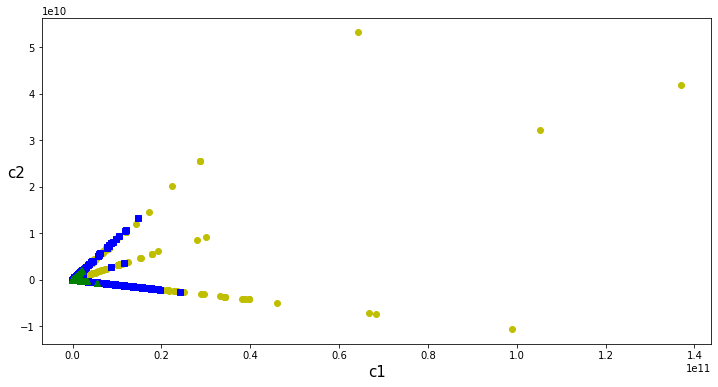

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.plot(df_reduced["c1"][y_df==0], df_reduced["c2"][y_df==0], "yo", label="normal")
plt.plot(df_reduced["c1"][y_df==1], df_reduced["c2"][y_df==1], "bs", label="adware")
plt.plot(df_reduced["c1"][y_df==2], df_reduced["c2"][y_df==2], "g^", label="malware")
plt.xlabel("c1", fontsize=15)
plt.ylabel("c2", fontsize=15, rotation=0)
plt.show()

In [ ]:
# Calculamos la proporción de varianza que se ha preservado del conjunto original
pca.explained_variance_ratio_

array([0.91695209, 0.05610877])

El resultado anterior nos indica que el 91,6% de la varianza del conjunto de datos original se mantiene en el primer eje, y el 5,6% en el segundo eje. Esto quiere decir que aproximadamente 2,8% de la varianza se mantiene en el resto de ejes que no se han utilizado para construir el nuevo conjunto, por lo tanto, es razonable pensar que el resto de características del conjunto de datos no aportaban demasiada información.

**Representamos el límite de decisión que generaría un algoritmo en este nuevo conjunto de datos reducido**

In [ ]:
# Generamos un modelo con el conjunto de datos reducido
from sklearn.tree import DecisionTreeClassifier

clf_tree_reduced = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_tree_reduced.fit(df_reduced, y_df)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

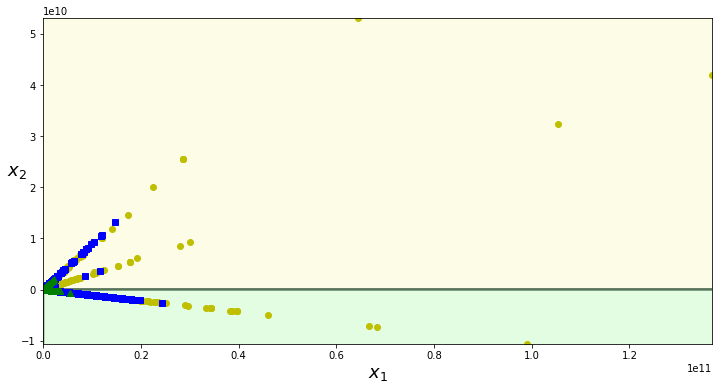

In [ ]:
# Representamos el límite de decisión generado por el modelo
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, plot_training=True, resolution=1000):
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    x1, x2 = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="normal")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="adware")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="malware")
        plt.axis([mins[0], maxs[0], mins[1], maxs[1]])
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

plt.figure(figsize=(12, 6))
plot_decision_boundary(clf_tree_reduced, df_reduced.values, y_df)
plt.show()

Si nuestro objetivo no es visualizar el conjunto de datos, sino reducir la dimensionalidad del conjunto de datos original, en lugar de seleccionar arbitrariamente el numero de dimensiones, sklearn nos proporciona un mecanismo para seleccionar aquellas dimensiones que mantienen un determinado porcetaje de varianza.

In [ ]:
# Reducimos el conjunto de datos manteniendo el 99,9% de varianza
from sklearn.decomposition import PCA

pca = PCA(n_components=0.999)
df_reduced = pca.fit_transform(X_df)

In [ ]:
# Numero de dimensionaes del nuevo conjunto
print("Número de componentes:", pca.n_components_)

Número de componentes: 6


In [ ]:
# Calculamos la proporción de varianza que se ha preservado del conjunto original
pca.explained_variance_ratio_

array([9.16952089e-01, 5.61087653e-02, 2.16566915e-02, 3.65011318e-03,
       5.56686331e-04, 3.79356201e-04])

In [ ]:
# Transformamos a un DataFrame de Pandas
df_reduced = pd.DataFrame(df_reduced, columns=["c1", "c2", "c3", "c4", "c5", "c6"])
df_reduced["Class"] = y_df
df_reduced

,c1,c2,c3,c4,c5,c6,Class
0,-6.653632e+07,-9.564604e+06,3.437284e+06,-2.949219e+06,1.822415e+06,-1.049114e+06,0
1,-6.704580e+07,-9.898031e+06,3.424601e+06,-3.127607e+06,2.800781e+06,-1.063954e+06,0
2,-6.712784e+07,-9.875840e+06,3.461085e+06,-3.118886e+06,2.823975e+06,-1.022121e+06,0
3,-6.699982e+07,-9.782837e+06,3.436564e+06,-3.051254e+06,2.557188e+06,-9.126112e+05,0
4,-6.702599e+07,-9.829385e+06,3.484764e+06,-3.108501e+06,2.726738e+06,-1.074407e+06,0
...,...,...,...,...,...,...,...
631950,-6.712883e+07,-9.876545e+06,3.460169e+06,-3.121068e+06,2.841346e+06,-1.034425e+06,0
631951,-1.490810e+07,1.783457e+07,3.127773e+06,7.128419e+06,-3.846691e+07,-8.013578e+06,2
631952,2.098170e+07,6.844411e+07,-3.376382e+07,-2.849601e+07,2.306222e+06,-3.567339e+05,1
631953,1.163357e+07,3.237585e+07,5.077168e+06,1.323917e+07,-5.531286e+07,-1.294719e+07,0


## 4. División del conjunto de datos

In [ ]:
# Dividimos el conjunto de datos
train_set, val_set, test_set = train_val_test_split(df_reduced)

In [ ]:
X_train, y_train = remove_labels(train_set, 'Class')
X_val, y_val = remove_labels(val_set, 'Class')
X_test, y_test = remove_labels(test_set, 'Class')

## 5. Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Predecimos con el conjunto de datos de validación
y_val_pred = clf_rnd.predict(X_val)

In [ ]:
# F1 score conjunto de datos de validación
print("F1 score validation test:", f1_score(y_val_pred, y_val, average='weighted'))

F1 score validation test: 0.8914140064148489


In [ ]:
# Predecimos con el conjunto de datos de pruebas
y_test_pred = clf_rnd.predict(X_test)

In [ ]:
# F1 score conjunto de datos de pruebas
print("F1 score test set:", f1_score(y_test_pred, y_test, average='weighted'))

F1 score test set: 0.8945365648002198
